# 1D Linear Regression Using Gradient Descent

Here we will introduce 1D Linear Regression and compute the weights using Gradient Descent.

This notebook will give you an algorithm that will work for n number of input features but first we'll test it on 1D data.

## Process

* Loading the data
* Exploring the data
* Adding bias to our input 
* Computing the cost function $J(\theta)$
* Implementing Gradient Descent
* Computing the hypothesis
* Plotting our line of best fit
* Making a Prediction
* Visualizing $J(\theta)$
* Determine how well the model performed

## Equations
The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where $m$ is the number of training examples,

$y^{(i)}$ is the label or output value from the dataset for a specific row which is determined by the index $i$,

$x^{(i)}$ is a specific row of the feature matrix which is determined once again by the index $i$,

$h_\theta(x)$ is the hypothesis which is given by the linear model

$$ h_\theta(x) = \theta^T x = \theta_0x_0 + \theta_1 x_1$$

where $\theta$ is a column vector of weights, i.e.,
$$ \theta = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \\ \vdots \\ \theta_n \end{bmatrix} $$

These weights are estimated using the gradient descent algorithm specifically the batch gradient descent algorithm which is a procedure of simultaneously updating the values of $\theta_j$, i.e.,

$$ \theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} $$ 

where $j = 0, 1, ..., n$ represents the feature index number with $n$ representing the number of features,

$\alpha$ represents the learning rate,

$x_j^{(i)}$ represents a value in the feature matrix for a specific row which is determined by the index $i$ and the value in the specified row is determined by the feature index $j$, and

$:=$ means to assign the value computed on the right-hand side to the variable on the left-hand side.

Note (1): As long as the learning rate $\alpha$ is not too large with each step of gradient descent, the weights $\theta_j$ will become closer to the optimal values that will achieve the lowest cost $J(\theta)$.

If $\alpha$ is too large this can cause gradient descent to diverge which means a local minimum or global minimum will not be found, and the smaller $\alpha$ is the longer it will take gradient descent to find the minimum.

So, you can think of alpha as the size of the step that is being taken with each iteration.

Note (2): Here we will be performing 1D Linear Regression which means $n = 1$, and our training data has 97 rows which means $m = 97$

In [1]:
import os

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## Loading the data

In [2]:
data = np.loadtxt('data/population_vs_profit.txt', delimiter=',')
m = len(data)
n = len(data[0]) - 1
print("Shape of data", data.shape)
print("Number of samples", m)
print("Number of features", n)
X, y = data[:, n-1], data[:, n]

Shape of data (97, 2)
Number of samples 97
Number of features 1


## Exploring the data

### Plotting the data

#### Is our data linear?

We can show a simple 2D plot to get a general idea if our feature has a linear relationship with our output.

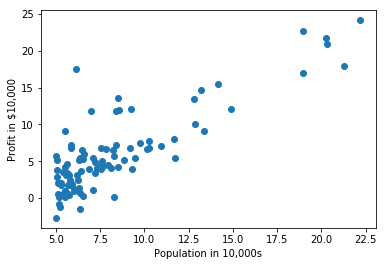

In [3]:
plt.scatter(X, y)
plt.ylabel('Profit in $10,000')
plt.xlabel('Population in 10,000s');

Our data seems to be pretty linear so Linear Regression seems like a good option.

### Visualizing the shape of our data

$X$ is a feature matrix that is $m$ $x$ $(n + 1)$ where:

* $m =$ number of training examples
* $n =$ number of features

$\vec{y}$ is our ouput vector that is $m$ $x$ $1$

In [4]:
print("The shape of X is", X.shape)
print("The shape of y is", y.shape)

The shape of X is (97,)
The shape of y is (97,)


## Adding bias to our input

This is the process of adding the feature $x_0$ to

$$ h_\theta(x) = \theta_0 + \theta_1 x_1 $$

To do this we add a column of 1's to our feature matrix and call it $x_0$

Note: If we have more than one feature and our features differ by orders of magnitude, then we would normalize the features before adding the bias to our input. Feature normalization is utilized because it can cause gradient descent to converge at a faster rate. However, here we have only one feature, so we will not be utilizing feature normalization in this example.

In [44]:
# here we add a column of 1's for our bias we'll use stack for numpy arrays with shape (m,)
# the numpy function stack joins arrays along a given axis 
# the first axis (axis=0) refers to rows (training examples) and the second axis (axis=1) refers to columns (features).
# Note: Running this cell more than once will result in an error since all the input arrays will no longer be the same shape
X = np.stack([np.ones(m), X], axis=1)

print("Shape of X is", X.shape)
print("Example feature vector", X[0])

Shape of X is (97, 2)
Example feature vector [1.     6.1101]


## Computing the cost function $J(\theta)$

In [6]:
# function to compute cost
def computeCost(X, y, theta):
    
    # get number of training examples
    m = y.shape[0]
    
    # compute hypothesis
    h = X@theta
    
    # compute cost function
    J = 1/(2*m)*sum((h-y)**2)
    
    return J

## Implementing Gradient Descent

In [67]:
# function for implementing gradient descent
def gradientDescent(X, y, theta, alpha, num_iters):
    
    # get number of training examples
    m = y.shape[0]
    
    # Use a list to store the values of the cost function for every iteration
    J_history = []
    
    for i in range(num_iters):
        
        # Note: h can also be calculated as h = theta@X.T, h = theta.T@X.T, or h = X@theta.T because the shape of theta is (2,) in numpy which means it can act as a row vector or a column vector and it will return h with the same shape of (97,)  
        h = X@theta
        
        theta = theta - alpha * (1/m) * (h-y)@X
        
        # save the cost on every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

In [70]:
# initialize the weigths to 0
theta = np.zeros(2)

# some gradient descent settings
num_iters = 1500
alpha = 0.01

theta, J_history = gradientDescent(X, y, theta, alpha, num_iters)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

Theta found by gradient descent: -3.6303, 1.1664
Expected theta values (approximately): [-3.6303, 1.1664]


## Computing the hypothesis

We'll take our feature matrix $X$ and pretend we dont know our output vector $\vec{y}$.

Now using the weights we found we'll try and predict what $\vec{y}$ should be at any point.

In [40]:
# Note: h can also be calculated as h = theta@X.T, h = theta.T@X.T, or h = X@theta.T because the shape of theta is (2,) in numpy which means it can act as a row vector or a column vector and it will return h with the same shape of (97,)  
h = X@theta

# allows us to make sure h has the expected shape
print("Shape of h is", h.shape)

Shape of h is (97,)


## Plotting our line of best fit

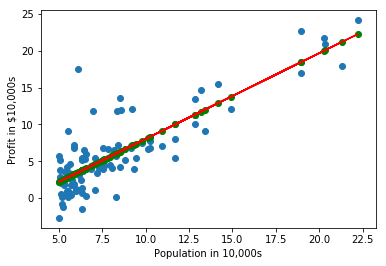

In [41]:
# X[:, 1] returns all of the rows of X in its second column remember the first column of X consists of 1's 
plt.scatter(X[:, 1], y)
plt.scatter(X[:, 1], h, c='green')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population in 10,000s')
plt.plot(X[:, 1], h, c='red');

# Making a prediction

Now we can create an input vector and get an estimated result.

In [42]:
# Note: 4.5 corresponds to a of population of 15,000 since the each value in the dataset is divided by 10,000
input_vec = [4.5]

# add a bias since all inputs must begin with 1
input_vec_bias = np.append(1, input_vec)

# make a prediction
profit = input_vec_bias@theta

print("Input vector", input_vec)
print("Input vector with bias", input_vec_bias)
print("theta", theta)
print("Profit", profit*10000)

Input vector [4.5]
Input vector with bias [1.  4.5]
theta [-3.63029144  1.16636235]
Profit 16183.39137105758


## Visualizing $J(\theta)$

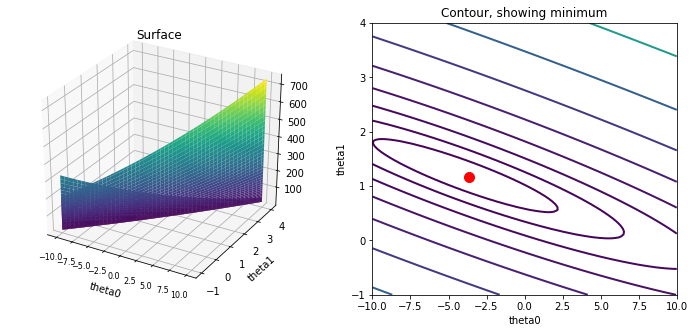

In [53]:
# grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
ax.xaxis.set_tick_params(labelsize=8)
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = plt.subplot(122)
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
plt.title('Contour, showing minimum')
pass

## Determine how well the model performed

We need some numerical measure to see how well our model performed

For this we can use $R^2$ (R-Squared)

We ususally use this for any regression not just Linear Regression

The definition for R-Squared is the following:

$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

where: 

$SS_{res}$ is the sum of squared residual 

and

$SS_{tot}$ is the sum of squared total

These are defined as:

$$SS_{res} = \sum^m_{i=1}(y^{(i)} - h_\theta(X))^2$$

<br />

$$SS_{tot} = \sum^m_{i=1}(y^{(i)} - \bar{y}^{(i)})^2$$

$R^2 = 1$ is a perfect model

$R^2 = 0$ is basically the average (50%)

$R^2 = -$ is worse than just computing the average

In [54]:
SSres = sum((y-h)**2)

SStot = sum((y-y.mean())**2)

R2 = 1 - SSres/SStot

print('SSres is: ', SSres)
print('SStot is:', SStot)
print('R-squared is: ', R2)

SSres is:  869.7773217780192
SStot is: 2914.8470516572247
R-squared is:  0.7016044731117159
